In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from dlc_practical_prologue import *
from projet1_helpers import *
import baseline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
train_input.shape

NameError: name 'train_input' is not defined

## Baseline
Use basic mlp

In [ ]:
accuracies = []
mini_batch_size = 100
for i in range(15):
    print("-"*50,f" \n Iteration {i} \n ")
    # Generate the pairs
    train_input, train_target, train_classes, test_input, test_target, test_classes = generate_pair_sets(1000)
    
    # convert to one hot
    train_target = convert_to_one_hot_labels(train_input,train_target)
    test_target = convert_to_one_hot_labels(test_input,test_target)
    # flatten
    train_input = train_input.view(train_input.size(0), -1)
    test_input = test_input.view(test_input.size(0), -1)
    
    # define the model
    model =  baseline.MLP() 
    
    # train model
    for k in range(20):
        baseline.train(model, train_input, train_target.float(), mini_batch_size)
    print(f"Baseline Training accuracy is {baseline.accuracy(model,train_input,train_target)} ")
    test_accuracy = baseline.accuracy(model,test_input,test_target)
    accuracies.append(test_accuracy )
    print(f"Baseline Test accuracy is {test_accuracy} ")

--------------------------------------------------  
 Iteration 0 
 
Baseline Training accuracy is 0.995 
Baseline Test accuracy is 0.759 
--------------------------------------------------  
 Iteration 1 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.745 
--------------------------------------------------  
 Iteration 2 
 
Baseline Training accuracy is 1.0 
Baseline Test accuracy is 0.706 
--------------------------------------------------  
 Iteration 3 
 
Baseline Training accuracy is 1.0 
Baseline Test accuracy is 0.747 
--------------------------------------------------  
 Iteration 4 
 
Baseline Training accuracy is 0.999 
Baseline Test accuracy is 0.756 
--------------------------------------------------  
 Iteration 5 
 
Baseline Training accuracy is 0.998 
Baseline Test accuracy is 0.721 
--------------------------------------------------  
 Iteration 6 
 


### Evaluation of model performance

In [7]:
accs = torch.Tensor(accuracies)
print(f"The accuracy of the model is {accs.mean():.4f} ± {accs.var():.4f} ")

The accuracy of the model is 0.7362 ± 0.0002 


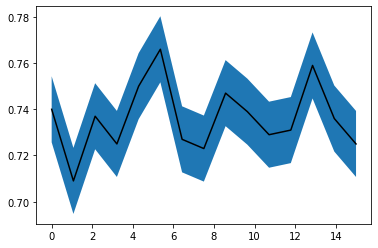

In [8]:
plot_performance(accuracies,15)